In [1]:
import pandas as pd
import numpy as np

In [14]:
data = pd.read_csv("complete_filled_data.csv")

In [18]:
# i don't know why added index

In [15]:
data

,Unnamed: 0,Country Code,Country Name,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],...,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]","Manufacturing, value added (current US$) [NV.IND.MANF.CD]","Population, total [SP.POP.TOTL]",Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]",Income Group
0,0,AFG,Afghanistan,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,...,0.626149,2.071349,6.160177,22.921060,1.134634e+09,36686784.0,71.400,11.11000,17.660000,L
1,1,ALB,Albania,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,...,2.028060,1.473058,6.133262,6.259229,9.295837e+08,2866376.0,37.300,12.30000,44.520000,UM
2,2,DZA,Algeria,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,...,4.269990,6.757341,26.549953,-4.603222,4.643876e+10,41927007.0,66.100,10.41600,68.019997,UM
3,3,ASM,American Samoa,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,...,2.449298,1.695361,13.928013,16.867470,8.900000e+07,48424.0,37.319,11.64394,65.832500,UM
4,4,AND,Andorra,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,...,1.746736,1.012478,3.610284,-2.170767,1.161904e+08,75013.0,30.693,9.17921,85.912900,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,VIR,Virgin Islands (U.S.),46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,...,2.209071,1.441528,6.280419,6.490585,2.055841e+08,107001.0,33.544,12.24500,93.419998,H
213,213,PSE,West Bank and Gaza,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,...,-0.195108,-0.301993,11.547252,0.341530,1.879500e+09,4569087.0,15.300,26.26000,69.739998,LM
214,214,YEM,"Yemen, Rep.",61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,...,10.452350,14.853665,8.204987,-0.865687,2.183560e+09,30790513.0,26.600,13.07600,45.299999,L
215,215,ZMB,Zambia,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,...,7.494572,7.411571,6.847766,4.071350,1.801756e+09,17835893.0,15.600,5.03000,24.860001,LM


In [16]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [17]:
data

,Country Code,Country Name,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],...,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]","Manufacturing, value added (current US$) [NV.IND.MANF.CD]","Population, total [SP.POP.TOTL]",Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]",Income Group
0,AFG,Afghanistan,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,4310.0,...,0.626149,2.071349,6.160177,22.921060,1.134634e+09,36686784.0,71.400,11.11000,17.660000,L
1,ALB,Albania,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,960.0,...,2.028060,1.473058,6.133262,6.259229,9.295837e+08,2866376.0,37.300,12.30000,44.520000,UM
2,DZA,Algeria,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,5530.0,...,4.269990,6.757341,26.549953,-4.603222,4.643876e+10,41927007.0,66.100,10.41600,68.019997,UM
3,ASM,American Samoa,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,8021.0,...,2.449298,1.695361,13.928013,16.867470,8.900000e+07,48424.0,37.319,11.64394,65.832500,UM
4,AND,Andorra,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,12.5,...,1.746736,1.012478,3.610284,-2.170767,1.161904e+08,75013.0,30.693,9.17921,85.912900,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,Virgin Islands (U.S.),46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,8761.4,...,2.209071,1.441528,6.280419,6.490585,2.055841e+08,107001.0,33.544,12.24500,93.419998,H
213,PSE,West Bank and Gaza,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,16996.3,...,-0.195108,-0.301993,11.547252,0.341530,1.879500e+09,4569087.0,15.300,26.26000,69.739998,LM
214,YEM,"Yemen, Rep.",61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,2980.0,...,10.452350,14.853665,8.204987,-0.865687,2.183560e+09,30790513.0,26.600,13.07600,45.299999,L
215,ZMB,Zambia,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,13510.0,...,7.494572,7.411571,6.847766,4.071350,1.801756e+09,17835893.0,15.600,5.03000,24.860001,LM


In [19]:
from sklearn import set_config
set_config(display='diagram')

In [20]:
# KNN

In [21]:
retained_var_pol = [
    'Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]',
    'Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]',
    'Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]',
    'Access to electricity (% of population) [EG.ELC.ACCS.ZS]',
    'Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]',
    'Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]',
    'Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]',
    'Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]',
    'Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]',
    'CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD]',
    'CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD]',
    'CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD]',
    'CO2 emissions (kt) [EN.ATM.CO2E.KT]',
    'CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC]',
    'Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE]',
    'Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE]',
    'Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS]',
    'Renewable internal freshwater resources per capita (cubic meters) [ER.H2O.INTR.PC]',
    'Renewable internal freshwater resources, total (billion cubic meters) [ER.H2O.INTR.K3]',
    'Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]',    
]

retained_var_ec = [
    'Adjusted net national income (current US$) [NY.ADJ.NNTY.CD]',
    'Adjusted net national income per capita (current US$) [NY.ADJ.NNTY.PC.CD]',
    'Adjusted savings: carbon dioxide damage (% of GNI) [NY.ADJ.DCO2.GN.ZS]',
    'Adjusted savings: consumption of fixed capital (% of GNI) [NY.ADJ.DKAP.GN.ZS]',
    'Adjusted savings: education expenditure (% of GNI) [NY.ADJ.AEDU.GN.ZS]',
    'Adjusted savings: energy depletion (% of GNI) [NY.ADJ.DNGY.GN.ZS]',
    'Adjusted savings: mineral depletion (% of GNI) [NY.ADJ.DMIN.GN.ZS]',
    'Adjusted savings: mineral depletion (current US$) [NY.ADJ.DMIN.CD]',
    'Adjusted savings: natural resources depletion (% of GNI) [NY.ADJ.DRES.GN.ZS]',
    'Adjusted savings: net forest depletion (% of GNI) [NY.ADJ.DFOR.GN.ZS]',
    'Adjusted savings: particulate emission damage (% of GNI) [NY.ADJ.DPEM.GN.ZS]',
    'Age dependency ratio (% of working-age population) [SP.POP.DPND]',
    'Age dependency ratio, old (% of working-age population) [SP.POP.DPND.OL]',
    'Age dependency ratio, young (% of working-age population) [SP.POP.DPND.YG]',
    'Contributing family workers, total (% of total employment) (modeled ILO estimate) [SL.FAM.WORK.ZS]',
    'Current health expenditure per capita, PPP (current international $) [SH.XPD.CHEX.PP.CD]',
    'Employers, total (% of total employment) (modeled ILO estimate) [SL.EMP.MPYR.ZS]',
    'Exports of goods and services (% of GDP) [NE.EXP.GNFS.ZS]',
    'Exports of goods and services (current US$) [NE.EXP.GNFS.CD]',
    'Final consumption expenditure (current US$) [NE.CON.TOTL.CD]',
    'GDP growth (annual %) [NY.GDP.MKTP.KD.ZG]',
    'GDP (current US$) [NY.GDP.MKTP.CD]',
    'GDP per capita (current US$) [NY.GDP.PCAP.CD]',
    'General government final consumption expenditure (% of GDP) [NE.CON.GOVT.ZS]',
    'General government final consumption expenditure (current US$) [NE.CON.GOVT.CD]',
    'GNI (current US$) [NY.GNP.MKTP.CD]',
    'GNI, PPP (current international $) [NY.GNP.MKTP.PP.CD]',
    'Imports of goods and services (BoP, current US$) [BM.GSR.GNFS.CD]',
    'Imports of goods and services (current US$) [NE.IMP.GNFS.CD]',
    'Industry (including construction), value added (% of GDP) [NV.IND.TOTL.ZS]',
    'Industry (including construction), value added (annual % growth) [NV.IND.TOTL.KD.ZG]',
    'Industry (including construction), value added (current US$) [NV.IND.TOTL.CD]',
    'Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]',
    'Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]',
    'Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]',
    'Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]',
    'Manufacturing, value added (current US$) [NV.IND.MANF.CD]',
    'Population, total [SP.POP.TOTL]',
    'Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS]',
    'Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]',
    'Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]',
]

In [36]:
numerical_data = data[retained_var_pol + retained_var_ec]

In [37]:
numerical_data

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],"Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]",CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD],...,"Industry (including construction), value added (current US$) [NV.IND.TOTL.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]","Manufacturing, value added (current US$) [NV.IND.MANF.CD]","Population, total [SP.POP.TOTL]",Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
0,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,4310.0,43.015907,0.285766,...,2.465777e+09,0.626149,2.071349,6.160177,22.921060,1.134634e+09,36686784.0,71.400,11.11000,17.660000
1,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,960.0,3.561338,0.402284,...,3.225184e+09,2.028060,1.473058,6.133262,6.259229,9.295837e+08,2866376.0,37.300,12.30000,44.520000
2,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,5530.0,87.152129,0.942713,...,6.787449e+10,4.269990,6.757341,26.549953,-4.603222,4.643876e+10,41927007.0,66.100,10.41600,68.019997
3,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,8021.0,54.856368,0.550605,...,2.885046e+08,2.449298,1.695361,13.928013,16.867470,8.900000e+07,48424.0,37.319,11.64394,65.832500
4,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,12.5,14.551136,0.166129,...,3.564714e+08,1.746736,1.012478,3.610284,-2.170767,1.161904e+08,75013.0,30.693,9.17921,85.912900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,8761.4,73.693497,0.546002,...,7.497339e+08,2.209071,1.441528,6.280419,6.490585,2.055841e+08,107001.0,33.544,12.24500,93.419998
213,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,16996.3,36.908867,0.184911,...,3.138800e+09,-0.195108,-0.301993,11.547252,0.341530,1.879500e+09,4569087.0,15.300,26.26000,69.739998
214,61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,2980.0,169.761905,0.264208,...,3.286122e+09,10.452350,14.853665,8.204987,-0.865687,2.183560e+09,30790513.0,26.600,13.07600,45.299999
215,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,13510.0,1.960100,0.325507,...,9.073637e+09,7.494572,7.411571,6.847766,4.071350,1.801756e+09,17835893.0,15.600,5.03000,24.860001


In [92]:
numerical_data_pol = data[retained_var_pol]

In [46]:
import matplotlib.pyplot as plt # for data visualization
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [93]:
numerical_data_pol.shape

(217, 20)

In [94]:
numerical_data_pol

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],"Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]",CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Renewable internal freshwater resources per capita (cubic meters) [ER.H2O.INTR.PC],"Renewable internal freshwater resources, total (billion cubic meters) [ER.H2O.INTR.K3]",Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
0,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,4310.0,43.015907,0.285766,0.080291,0.078417,6070.000172,0.165455,15909.999850,4690.0,17.96,1285.203958,47.150000,27690.000530
1,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,960.0,3.561338,0.402284,0.133868,0.132072,5110.000134,1.782739,3009.999990,1080.0,38.11,9384.672492,26.900000,9449.999809
2,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,5530.0,87.152129,0.942713,0.336716,0.328859,165539.993300,3.948290,94400.001530,12510.0,0.19,268.251917,11.247000,278029.998800
3,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,8021.0,54.856368,0.550605,0.207998,0.203138,174855.301167,4.268198,80874.700065,9969.3,0.49,9259.463193,120.582702,265788.500928
4,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,12.5,14.551136,0.166129,0.207652,0.203103,490.000009,6.532201,50.000001,0.0,18.58,4207.270740,0.315600,620.000005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,8761.4,73.693497,0.546002,0.207831,0.203225,182344.201484,7.719888,56363.799946,10617.7,3.43,2342.835693,42.143560,257706.901498
213,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,16996.3,36.908867,0.184911,0.207365,0.203818,179023.900372,3.714701,81291.800503,21141.8,12.73,177.716029,0.812000,283953.200525
214,61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,2980.0,169.761905,0.264208,0.208075,0.203958,9720.000267,0.315682,10619.999890,3080.0,3.60,68.202826,2.100000,23860.000610
215,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,13510.0,1.960100,0.325507,0.126504,0.123552,7730.000019,0.433396,15250.000000,13990.0,82.28,4496.550860,80.200000,37560.001370


In [50]:
# summary of dataset
numerical_data_pol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 20 columns):
 #   Column                                                                                                 Non-Null Count  Dtype  
---  ------                                                                                                 --------------  -----  
 0   Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]                  217 non-null    float64
 1   Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]  217 non-null    float64
 2   Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]  217 non-null    float64
 3   Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                               217 non-null    float64
 4   Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]                          

In [51]:
numerical_data_pol.isnull().sum()

Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS]                    0
Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]    0
Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]    0
Access to electricity (% of population) [EG.ELC.ACCS.ZS]                                                 0
Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]                                 0
Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]                                 0
Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE]           0
Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE]     0
Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]                          0
CO2 emissions (kg per 2015 US$ of GDP

In [54]:
# stat summary
numerical_data_pol.describe()

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],"Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]",CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Renewable internal freshwater resources per capita (cubic meters) [ER.H2O.INTR.PC],"Renewable internal freshwater resources, total (billion cubic meters) [ER.H2O.INTR.K3]",Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,2.170000e+02,217.000000,2.170000e+02,217.000000,217.000000,217.000000,217.000000,2.170000e+02
mean,63.849306,53.588164,74.699811,85.729718,80.041884,92.952226,18423.013364,11875.718894,145.638883,0.459472,0.209359,0.204414,1.805601e+05,4.555470,4.457537e+04,15262.141935,28.361569,14049.449394,211.748889,2.487725e+05
std,36.247940,40.895204,32.226523,24.319804,31.801958,14.922655,49970.373387,33155.572183,681.197632,0.320194,0.124771,0.121644,8.155970e+05,4.691695,1.174613e+05,47142.719497,27.593797,42767.434155,630.505532,9.868741e+05
min,0.000000,0.000000,0.000000,6.173170,1.000000,12.287594,0.000000,0.000000,0.020721,0.050740,0.034177,0.033380,1.000000e+01,0.035826,0.000000e+00,0.000000,0.000000,0.000000,0.000000,3.000000e+01
25%,42.048000,13.850000,67.300000,81.075653,69.457657,94.148376,850.000000,770.000000,2.633218,0.248235,0.132328,0.129240,3.690000e+03,0.920387,3.120000e+03,1080.000000,6.920000,1035.619083,6.859000,1.040000e+04
50%,78.300000,56.100000,91.000000,99.900002,99.900002,99.996071,4740.000000,3574.500000,13.070068,0.360595,0.202573,0.197847,2.155000e+04,3.412722,1.197000e+04,4690.000000,17.960000,2978.036327,40.400000,4.661000e+04
75%,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,17754.500000,9470.000000,36.908867,0.563417,0.231971,0.226559,1.682090e+05,6.532201,4.891890e+04,12510.000000,43.970000,9384.672492,122.000000,2.486551e+05
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,499610.000000,340010.000000,7750.000000,1.879058,0.841022,0.821398,1.050293e+07,31.235406,1.158960e+06,544840.000000,96.380000,481967.334000,5661.000000,1.247109e+07


In [55]:
cols = numerical_data_pol.columns

In [56]:
from sklearn.preprocessing import MinMaxScaler

ms = MinMaxScaler()

numerical_data_pol = ms.fit_transform(numerical_data_pol)

In [57]:
X = pd.DataFrame(numerical_data_pol, columns=[cols])

In [58]:
X.head()


,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],"Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]",CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD],CO2 emissions (kg per 2017 PPP $ of GDP) [EN.ATM.CO2E.PP.GD.KD],CO2 emissions (kg per PPP $ of GDP) [EN.ATM.CO2E.PP.GD],CO2 emissions (kt) [EN.ATM.CO2E.KT],CO2 emissions (metric tons per capita) [EN.ATM.CO2E.PC],Methane emissions (kt of CO2 equivalent) [EN.ATM.METH.KT.CE],Nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.KT.CE],Renewable energy consumption (% of total final energy consumption) [EG.FEC.RNEW.ZS],Renewable internal freshwater resources per capita (cubic meters) [ER.H2O.INTR.PC],"Renewable internal freshwater resources, total (billion cubic meters) [ER.H2O.INTR.K3]",Total greenhouse gas emissions (kt of CO2 equivalent) [EN.ATM.GHGT.KT.CE]
0,0.30900,0.13850,0.816000,0.963935,0.955416,0.995736,0.021096,0.012676,0.005548,0.128548,0.057153,0.057153,0.000577,0.004155,0.013728,0.008608,0.186346,0.002667,0.008329,0.002218
1,0.79800,0.62500,0.922000,1.000000,1.000000,1.000000,0.004023,0.002823,0.000457,0.192278,0.123557,0.125242,0.000486,0.055992,0.002597,0.001982,0.395414,0.019472,0.004752,0.000755
2,0.99600,0.98700,1.000000,0.996780,0.990619,0.999247,0.013651,0.016264,0.011243,0.487865,0.374965,0.374965,0.015760,0.125401,0.081452,0.022961,0.001971,0.000557,0.001987,0.022292
3,0.44296,0.20185,0.706645,0.619524,0.394670,0.867138,0.039744,0.023590,0.007076,0.273402,0.215433,0.215424,0.016647,0.135655,0.069782,0.018298,0.005084,0.019212,0.021301,0.021310
4,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,0.000056,0.000037,0.001875,0.063113,0.215004,0.215380,0.000046,0.208220,0.000043,0.000000,0.192779,0.008729,0.000056,0.000047


In [59]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) 

kmeans.fit(X)

C:\Users\isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [60]:
kmeans.cluster_centers_

array([[4.52827500e-01, 2.22565776e-01, 6.97596379e-01, 9.30650465e-01,
        8.81844359e-01, 9.78137987e-01, 3.12726133e-02, 2.25843560e-02,
        1.08199574e-02, 2.52790883e-01, 2.32136601e-01, 2.31904403e-01,
        9.39590908e-03, 1.39894429e-01, 3.07640257e-02, 1.65670782e-02,
        2.31881650e-01, 2.17053881e-02, 2.06998151e-02, 1.22162440e-02],
       [9.54814815e-01, 9.16254630e-01, 9.83449074e-01, 9.91417158e-01,
        9.83082397e-01, 9.96672893e-01, 2.07924311e-02, 2.27369239e-02,
        3.02167704e-02, 2.41167204e-01, 2.46739803e-01, 2.46712393e-01,
        1.29299752e-02, 2.01484306e-01, 3.01389170e-02, 1.79538471e-02,
        1.65377662e-01, 3.71012249e-02, 3.40858768e-02, 1.50552354e-02],
       [1.24617021e-01, 3.45957447e-02, 2.48521277e-01, 4.04135064e-01,
        2.55547913e-01, 6.63884493e-01, 2.58750762e-02, 2.42101765e-02,
        3.73801495e-03, 1.42539343e-01, 1.21957259e-01, 1.21955168e-01,
        8.60733295e-04, 1.51927051e-02, 1.62500798e-02, 1.8697

In [61]:
kmeans.inertia_

55.64366701304286

C:\Users\isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\isabe\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\isabe\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn

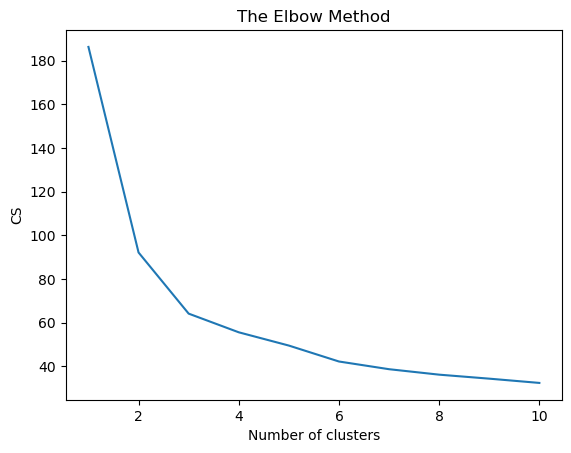

In [62]:
from sklearn.cluster import KMeans
cs = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    cs.append(kmeans.inertia_)
plt.plot(range(1, 11), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [63]:
# -------------------------------------------------------

In [73]:
data = pd.read_csv("complete_filled_data.csv")

In [74]:
data

,Unnamed: 0,Country Code,Country Name,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],...,"Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]","Manufacturing, value added (current US$) [NV.IND.MANF.CD]","Population, total [SP.POP.TOTL]",Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]",Income Group
0,0,AFG,Afghanistan,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,...,0.626149,2.071349,6.160177,22.921060,1.134634e+09,36686784.0,71.400,11.11000,17.660000,L
1,1,ALB,Albania,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,...,2.028060,1.473058,6.133262,6.259229,9.295837e+08,2866376.0,37.300,12.30000,44.520000,UM
2,2,DZA,Algeria,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,...,4.269990,6.757341,26.549953,-4.603222,4.643876e+10,41927007.0,66.100,10.41600,68.019997,UM
3,3,ASM,American Samoa,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,...,2.449298,1.695361,13.928013,16.867470,8.900000e+07,48424.0,37.319,11.64394,65.832500,UM
4,4,AND,Andorra,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,...,1.746736,1.012478,3.610284,-2.170767,1.161904e+08,75013.0,30.693,9.17921,85.912900,H
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,212,VIR,Virgin Islands (U.S.),46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,...,2.209071,1.441528,6.280419,6.490585,2.055841e+08,107001.0,33.544,12.24500,93.419998,H
213,213,PSE,West Bank and Gaza,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,...,-0.195108,-0.301993,11.547252,0.341530,1.879500e+09,4569087.0,15.300,26.26000,69.739998,LM
214,214,YEM,"Yemen, Rep.",61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,...,10.452350,14.853665,8.204987,-0.865687,2.183560e+09,30790513.0,26.600,13.07600,45.299999,L
215,215,ZMB,Zambia,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,...,7.494572,7.411571,6.847766,4.071350,1.801756e+09,17835893.0,15.600,5.03000,24.860001,LM


In [75]:
data = data.drop(['Unnamed: 0'], axis = 1)

In [76]:
data.shape

(217, 64)

In [77]:
numerical_data = data[retained_var_pol + retained_var_ec]

In [78]:
numerical_data

,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],"Annual freshwater withdrawals, total (% of internal resources) [ER.H2O.FWTL.ZS]",CO2 emissions (kg per 2015 US$ of GDP) [EN.ATM.CO2E.KD.GD],...,"Industry (including construction), value added (current US$) [NV.IND.TOTL.CD]","Inflation, consumer prices (annual %) [FP.CPI.TOTL.ZG]","Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]","Manufacturing, value added (current US$) [NV.IND.MANF.CD]","Population, total [SP.POP.TOTL]",Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]"
0,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,4310.0,43.015907,0.285766,...,2.465777e+09,0.626149,2.071349,6.160177,22.921060,1.134634e+09,36686784.0,71.400,11.11000,17.660000
1,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,960.0,3.561338,0.402284,...,3.225184e+09,2.028060,1.473058,6.133262,6.259229,9.295837e+08,2866376.0,37.300,12.30000,44.520000
2,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,5530.0,87.152129,0.942713,...,6.787449e+10,4.269990,6.757341,26.549953,-4.603222,4.643876e+10,41927007.0,66.100,10.41600,68.019997
3,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,8021.0,54.856368,0.550605,...,2.885046e+08,2.449298,1.695361,13.928013,16.867470,8.900000e+07,48424.0,37.319,11.64394,65.832500
4,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,12.5,14.551136,0.166129,...,3.564714e+08,1.746736,1.012478,3.610284,-2.170767,1.161904e+08,75013.0,30.693,9.17921,85.912900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,8761.4,73.693497,0.546002,...,7.497339e+08,2.209071,1.441528,6.280419,6.490585,2.055841e+08,107001.0,33.544,12.24500,93.419998
213,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,16996.3,36.908867,0.184911,...,3.138800e+09,-0.195108,-0.301993,11.547252,0.341530,1.879500e+09,4569087.0,15.300,26.26000,69.739998
214,61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,2980.0,169.761905,0.264208,...,3.286122e+09,10.452350,14.853665,8.204987,-0.865687,2.183560e+09,30790513.0,26.600,13.07600,45.299999
215,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,13510.0,1.960100,0.325507,...,9.073637e+09,7.494572,7.411571,6.847766,4.071350,1.801756e+09,17835893.0,15.600,5.03000,24.860001


In [79]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import MinMaxScaler

In [80]:
# Initiate DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=10)

In [82]:
# Initiate scaler and scale data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(numerical_data)

In [83]:
# Fit DBSCAN on scaled data
dbscan.fit(data_scaled)

DBSCAN(eps=0.4, min_samples=10)

In [84]:
# Address outliers in a new column
data['outlier'] = dbscan.labels_

In [85]:
data

,Country Code,Country Name,Access to clean fuels and technologies for cooking (% of population) [EG.CFT.ACCS.ZS],"Access to clean fuels and technologies for cooking, rural (% of rural population) [EG.CFT.ACCS.RU.ZS]","Access to clean fuels and technologies for cooking, urban (% of urban population) [EG.CFT.ACCS.UR.ZS]",Access to electricity (% of population) [EG.ELC.ACCS.ZS],"Access to electricity, rural (% of rural population) [EG.ELC.ACCS.RU.ZS]","Access to electricity, urban (% of urban population) [EG.ELC.ACCS.UR.ZS]",Agricultural methane emissions (thousand metric tons of CO2 equivalent) [EN.ATM.METH.AG.KT.CE],Agricultural nitrous oxide emissions (thousand metric tons of CO2 equivalent) [EN.ATM.NOXE.AG.KT.CE],...,"Inflation, GDP deflator (annual %) [NY.GDP.DEFL.KD.ZG]","Manufacturing, value added (% of GDP) [NV.IND.MANF.ZS]","Manufacturing, value added (annual % growth) [NV.IND.MANF.KD.ZG]","Manufacturing, value added (current US$) [NV.IND.MANF.CD]","Population, total [SP.POP.TOTL]",Total tax and contribution rate (% of profit) [IC.TAX.TOTL.CP.ZS],"Unemployment, total (% of total labor force) (modeled ILO estimate) [SL.UEM.TOTL.ZS]","Wage and salaried workers, total (% of total employment) (modeled ILO estimate) [SL.EMP.WORK.ZS]",Income Group,outlier
0,AFG,Afghanistan,30.900,13.8500,81.6000,96.616135,95.586174,99.626022,10540.0,4310.0,...,2.071349,6.160177,22.921060,1.134634e+09,36686784.0,71.400,11.11000,17.660000,L,-1
1,ALB,Albania,79.800,62.5000,92.2000,100.000000,100.000000,100.000000,2010.0,960.0,...,1.473058,6.133262,6.259229,9.295837e+08,2866376.0,37.300,12.30000,44.520000,UM,-1
2,DZA,Algeria,99.600,98.7000,100.0000,99.697838,99.071304,99.933952,6820.0,5530.0,...,6.757341,26.549953,-4.603222,4.643876e+10,41927007.0,66.100,10.41600,68.019997,UM,-1
3,ASM,American Samoa,44.296,20.1850,70.6645,64.301104,40.072305,88.346347,19856.7,8021.0,...,1.695361,13.928013,16.867470,8.900000e+07,48424.0,37.319,11.64394,65.832500,UM,-1
4,AND,Andorra,100.000,100.0000,100.0000,100.000000,100.000000,100.000000,28.2,12.5,...,1.012478,3.610284,-2.170767,1.161904e+08,75013.0,30.693,9.17921,85.912900,H,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
212,VIR,Virgin Islands (U.S.),46.812,21.9865,72.8640,100.000000,100.000000,100.000000,19216.2,8761.4,...,1.441528,6.280419,6.490585,2.055841e+08,107001.0,33.544,12.24500,93.419998,H,-1
213,PSE,West Bank and Gaza,42.048,23.2360,72.6205,100.000000,100.000000,100.000000,24518.9,16996.3,...,-0.301993,11.547252,0.341530,1.879500e+09,4569087.0,15.300,26.26000,69.739998,LM,-1
214,YEM,"Yemen, Rep.",61.500,42.9000,93.7000,62.000000,40.096972,88.190659,4360.0,2980.0,...,14.853665,8.204987,-0.865687,2.183560e+09,30790513.0,26.600,13.07600,45.299999,L,-1
215,ZMB,Zambia,11.900,2.1000,24.6000,40.317890,12.466436,76.461876,10330.0,13510.0,...,7.411571,6.847766,4.071350,1.801756e+09,17835893.0,15.600,5.03000,24.860001,LM,-1


AttributeError: 'Rectangle' object has no property 'labels'

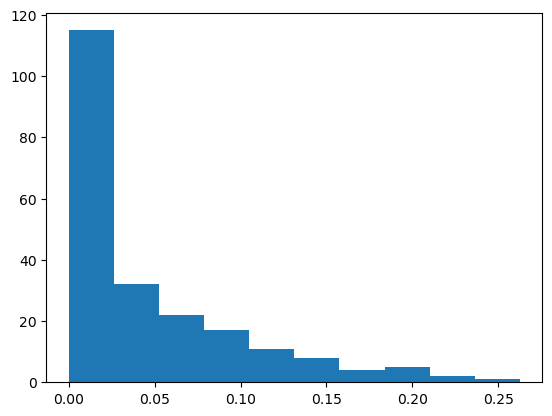

In [88]:
import math

# Function to calculate k distance
def calculate_k_distance(X,k):

    k_distance = []
    for i in range(len(X)):
        euclidean_dist = []
        for j in range(len(X)):
            euclidean_dist.append(
                math.sqrt(
                    ((X[i,0] - X[j,0]) ** 2) +
                    ((X[i,1] - X[j,1]) ** 2)))

        euclidean_dist.sort()
        k_distance.append(euclidean_dist[k])

    return k_distance

# Calculate and plot epsilon distance
eps_distance = calculate_k_distance(data_scaled, 10)
plt.hist(eps_distance, labels={'value':'Epsilon distance'})

In [91]:
#We can calculate the distance from each point to its closest neighbour using 
#the NearestNeighbors. The point itself is included in n_neighbors. 
#The kneighbors method returns two arrays, one which contains the distance 
#to the closest n_neighbors points and the other which contains the index 
#for each of those points.

import numpy as np

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

In [95]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(numerical_data_pol)
distances, indices = nbrs.kneighbors(numerical_data_pol)

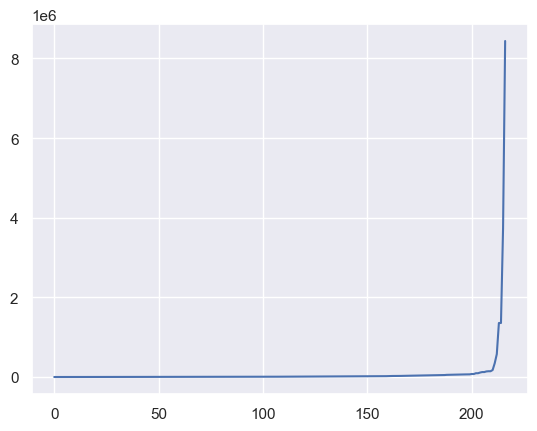

In [96]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)

In [97]:
numerical_data_ec = data[retained_var_ec]

In [98]:
neigh = NearestNeighbors(n_neighbors=2)
nbrs = neigh.fit(numerical_data_ec)
distances, indices = nbrs.kneighbors(numerical_data_ec)

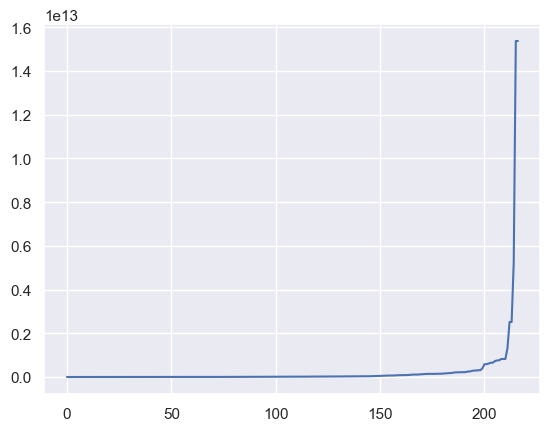

In [99]:
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)